# Task-1 Data Science and Bussiness Analytics Intership
# By Abhijit Pradip Baradkar Intern at Spark Foundation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as snf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Shree\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r"C:\Users\Shree\Documents\task1.csv")

In [3]:
df.head()
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Explorotery Data Analysis

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Remove The Outliers

In [10]:
def detection_outlier(df):
    num_columns=[]
    
    count=0
    y=[]
    for i in num_columns:
        z=np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df=df.drop(list(set(y)))
    df=df.reset_index()
    df=df.drop('index',axis=1)
    print(count)
    return df

In [11]:
df=detection_outlier(df)


0


# Distriution

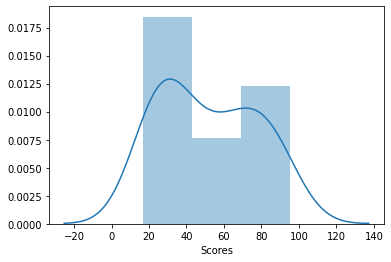

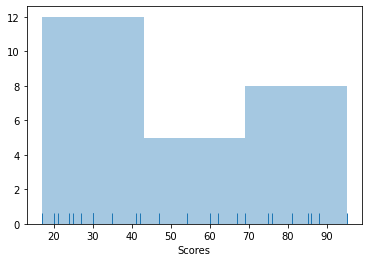

In [12]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"],kde=False,rug=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


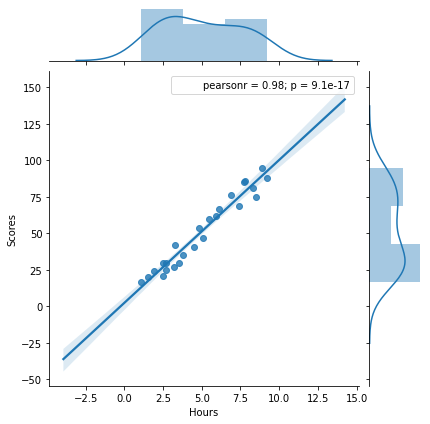

In [13]:
sns.jointplot(df["Hours"],df["Scores"],kind="reg").annotate(stats.pearsonr)
plt.show()

# Performing simple Linear Regression

# Calculating the coefficient of the simple loinear regression eqaution :y=Bo+B1.x(B1:slope,Bo:intercept)

In [14]:
mean_x = np.mean(df["Hours"])
mean_y = np.mean(df["Scores"])
num = 0
den = 0
x = list(df["Hours"])
y = list(df["Scores"])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [15]:
B1

9.775803390787475

In [16]:
Bo=mean_y-B1*mean_x

In [17]:
Bo

2.4836734053731746

# Making a prediction

In [18]:
df["prediction_scores"]=Bo + B1*df["Hours"]


In [19]:
df.head()


,Hours,Scores,prediction_scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

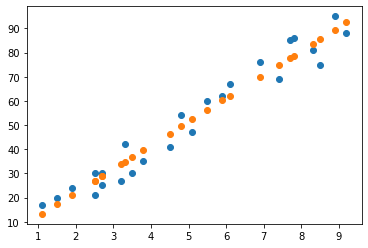

In [20]:
plt.scatter(df["Hours"],df["Scores"])
plt.scatter(df["Hours"],df["prediction_scores"])
plt.plot()

# prediction of an given value 9.25

In [21]:
Bo+B1*9.25

92.90985477015732

In [22]:
y=list(df["Scores"].values)
y_pred=list(df["prediction_scores"].values)

# RMSE

In [23]:
s=sum([(y_pred[i]-y[i])**2 for i in range(len(df))])
rmse=(np.sqrt(s/len(df)))/mean_y
rmse

0.10439521325937494

# OLS Model

In [24]:
model = snf.ols('Scores~Hours',data=df)
model=model.fit()

C:\Users\Shree\AppData\Roaming\Python\Python37\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [25]:
df['pred_ols']=model.predict(df['Hours'])

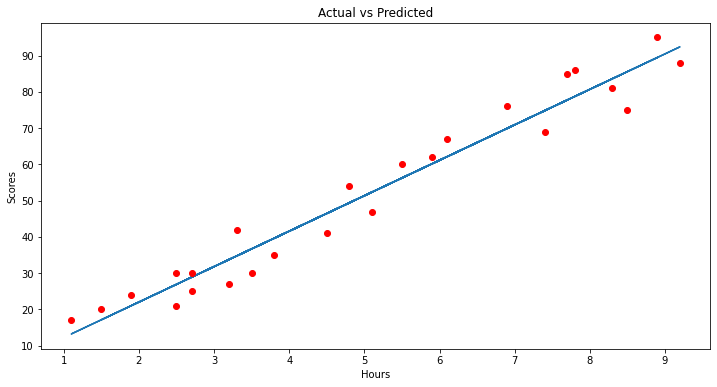

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df['Hours'],df['pred_ols'])               #regression line
plt.plot(df['Hours'],df['Scores'],'ro')          #scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# in this scatterplot we can easy to observed the predicted value for 9.25 hourse is around 92 

# Conclusion  in this case we can say categorical prediction

In [27]:
# consider a threshold to come a conclusion whether the student passed or fail
# we can consider here 38 as the cutoff to pass.
cut_off=38

In [28]:
df["Passed?"]=df["Scores"]>=40
df.head()

,Hours,Scores,prediction_scores,pred_ols,Passed?
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


# plotting the datas results

<AxesSubplot:xlabel='Passed?', ylabel='count'>

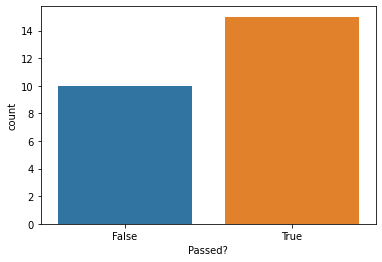

In [29]:
sns.countplot(df["Passed?"])

# Feature Engineering

In [30]:
feature=df["Hours"].values.reshape(-1,1)
target=df["Scores"].values

# Splitting the data

In [31]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=0)

# Training the regression model

In [32]:
from sklearn import linear_model 
ln=linear_model.LinearRegression()

In [33]:
ln.fit(x_train,y_train)

LinearRegression()

# Accuracy

In [34]:
ln.score(x_train,y_train)

0.9484509249326872

In [35]:
ln.score(x_test,y_test)

0.9367661043365056

# Predicting the outcomes

In [36]:
results=[[9.25]]
ln.predict(results)

array([93.89272889])